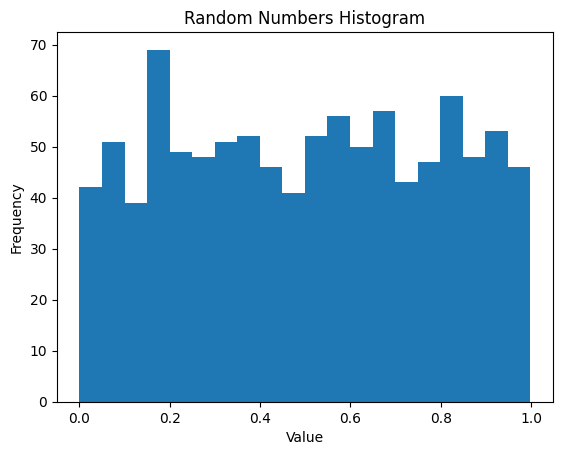

In [5]:
import random
import matplotlib.pyplot as plt

# Generate 1000 random numbers between 0 and 1
data = [random.random() for _ in range(1000)]

# Plot a histogram of the data
plt.hist(data, bins=20)
plt.title("Random Numbers Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# This is a level 1 heading
## This is a level 2 heading
### This is a level 3 heading

__bold__
**bold**

_italic_
*italic*

~~strikethrough~~

# Header 1
## Header 2
### Header 3
#### Header 4
##### Header 5
###### Header 6

> Blockquote

* List
* List
* List
1. List
2. List
3. List
[Link](https://www.google.com)
![Image](https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png)

`code`

```
code block
```

| Table | Table | Table |

```
# Path: Untitled-1.ipynb
__bold__
**bold**
_italic_
*italic*
...

```
```python
# Path: Untitled-1.ipynb
# `
# ```
```
# Path: Untitled-1.ipynb
# ```
# ```
```


# Closure of a set of Functional Dependencies
lets explain this.
we say that a set of functional dependencies F is closed under a set of functional dependencies G if every functional dependency in G is implied by F.

In [1]:
# Closure Algorithm
# we mark the closure with + sign. for example, if we have a set of attributes A, and we want to find the closure of A, we write it as A+.

# Our relation is: Emp = { employee_id, dept_no, manager}
Emp = { 'employee_id', 'dept_no', 'manager' }

# Our functional dependencies are: { employee_id->dept_no, dept_no->manager }
F = { 'employee_id' : {'dept_no'}, 'dept_no' : {'manager'} }

# We can see that the left hand side of the first functional dependency is a superkey,
# and the left hand side of the second functional dependency is a candidate key.

# We can find the closure of a set of attributes by using the following algorithm:
def closure(attributes, F):
    result = set(attributes)
    for X in F:
        if set(X).issubset(result):
            result = result.union(F[X])
    return result

print("Closure of Emp is: ", closure(Emp, F))

Closure of Emp is:  {'dept_no', 'employee_id', 'manager'}


In [ ]:
# we can aslo use the following command to run the notebook
# jupyter nbconvert --to notebook --execute my_notebook.ipynb

• [] + =  set()
• ['dept_no'] + =  {'dept_no', 'manager'}
• ['employee_id'] + = Emp
• ['dept_no', 'employee_id'] + = Emp
• ['manager'] + =  {'manager'}
• ['dept_no', 'manager'] + =  {'dept_no', 'manager'}
• ['employee_id', 'manager'] + = Emp
• ['dept_no', 'employee_id', 'manager'] + = Emp


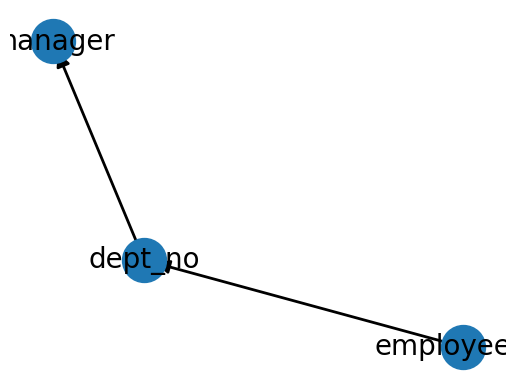

In [13]:
# Purpose: to demonstrate the use of the closure function
# now will find the closure of each SUBSET of the set of all attributes
# for each subset of Emp, find the closure
def powerset(s):
    result = [[]]
    for x in s:
        result += [subset + [x] for subset in result]
    return result

Emp = { 'employee_id', 'dept_no', 'manager' }
F = { 'employee_id' : {'dept_no'}, 'dept_no' : {'manager'} }

# now will find the closure of each SUBSET of the set of all attributes
power = powerset(Emp)

def closure(X):
    result = set(X)
    while True:
        temp = result.copy()
        for x in result:
            if x in F:
                result = result.union(F[x])
        if result == temp:
            break
    return result

for x in power:
    if (closure(x) == Emp):
        print("\u2022", x, "+ = Emp")
    else:
        print("\u2022", x, "+ = " ,closure(x))

# note that for each subset the closure contains the original subset
# thats because the trivial FDs are included in F
# FD - functional dependency


# also note that for R+=R (the closure of the set of all attributes)





import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes and edges of the graph
nodes = Emp
edges = [(k, v) for k, vs in F.items() for v in vs]

# Create the graph and add the nodes and edges
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph and display it
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
plt.axis("off")
plt.show()


In [58]:
# example 7.7
from tabulate import tabulate

R = {'A', 'B', 'C', 'D', 'E'}

# F = {A->CD, B->E, C->AE}
# syntax for FD is a tuple of two sets: (lhs, rhs)
F = {'A': {'C', 'D'}, 'B': {'E'}, 'C': {'A', 'E'}}

def powerset(s):
    power_set = [[]]
    for elem in s:
        for sub_set in power_set:
            power_set = power_set + [list(sub_set) + [elem]]
    return power_set


def closure(X):
    result = set(X)
    while True:
        temp = result.copy()
        for x in result:
            if x in F:
                result = result.union(F[x])
        if result == temp:
            break
    return result

# closure of {A} w.r.t. F
power_R = powerset(R)
table = []

for x in power_R:
    if (closure(x) == R):
        table.append([x, "R"])
    else:
        table.append([x, closure(x)])

print(tabulate(table, headers=["Subset", "Subset+"], tablefmt="simple", colalign=("left", "left")))

table_2 = []
for x in power:
    if (closure(x) == Emp):
        table_2.append([x, "Emp"])
    else:
        table_2.append([x, closure(x)])


print("\n\n")
print(tabulate(table_2, headers=["Subset", "Subset+"], tablefmt="plain", colalign=("left", "left")))

Subset                     Subset+
-------------------------  --------------------
[]                         set()
['D']                      {'D'}
['A']                      {'D', 'A', 'E', 'C'}
['D', 'A']                 {'D', 'A', 'E', 'C'}
['B']                      {'B', 'E'}
['D', 'B']                 {'B', 'E', 'D'}
['A', 'B']                 R
['D', 'A', 'B']            R
['E']                      {'E'}
['D', 'E']                 {'E', 'D'}
['A', 'E']                 {'D', 'A', 'E', 'C'}
['D', 'A', 'E']            {'D', 'A', 'E', 'C'}
['B', 'E']                 {'B', 'E'}
['D', 'B', 'E']            {'B', 'E', 'D'}
['A', 'B', 'E']            R
['D', 'A', 'B', 'E']       R
['C']                      {'D', 'A', 'E', 'C'}
['D', 'C']                 {'D', 'A', 'E', 'C'}
['A', 'C']                 {'D', 'A', 'E', 'C'}
['D', 'A', 'C']            {'D', 'A', 'E', 'C'}
['B', 'C']                 R
['D', 'B', 'C']            R
['A', 'B', 'C']            R
['D', 'A', 'B', 'C']       R
['

In [1]:
# well repeat and elaborate on the calculations of A+ and AB+ in the previous section

print("F = {A->CD, B->E, C->AE}")
print("A ⊆ R = {A, B, C, D, E}")
print("AB = {A, B} ⊆ R")
print("We'll calculate A+ and AB+\n\n")

# In[A+]:
print("1. CX:={A}")
print("2. A->CD leads to CX:={A}U{CD}={ACD}")
print("3. C->AE leads to cx:={ACD}U{AE}={ACDE}")
print("no more FDs that there attributes of there left hand side are in in CX, and there right hand side are not in CX")
print("so the key is {ACDE}")

print("\n\n")

# In[AB+]:
print("1. CX:={AB}")
print("2. A->CD leads to CX:={AB}U{CD}={ABCD}")
print("3. B->E leads to CX:={ABCD}U{E}={ABCDE}")
print("no more FDs that there attributes of there left hand side are in in CX, and there right hand side are not in CX")
print("so the key is {ABCDE} = AB+")


F = {A->CD, B->E, C->AE}
A ⊆ R = {A, B, C, D, E}
AB = {A, B} ⊆ R
We'll calculate A+ and AB+


1. CX:={A}
2. A->CD leads to CX:={A}U{CD}={ACD}
3. C->AE leads to cx:={ACD}U{AE}={ACDE}
no more FDs that there attributes of there left hand side are in in CX, and there right hand side are not in CX
so the key is {ACDE}



1. CX:={AB}
2. A->CD leads to CX:={AB}U{CD}={ABCD}
3. B->E leads to CX:={ABCD}U{E}={ABCDE}
no more FDs that there attributes of there left hand side are in in CX, and there right hand side are not in CX
so the key is {ABCDE} = AB+


# we can use the closure to check if a given attribute is a superkey

# a superkey is a set of attributes that uniquely identifies a tuple
# in a relation
# a candidate key is a minimal superkey

in the above example, we saw A